In [1]:
from kervis.utils import Model
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, Graphlet, WeisfeilerLehman

In [2]:
SP = Model("MUTAG", VertexHistogram, "SVM")

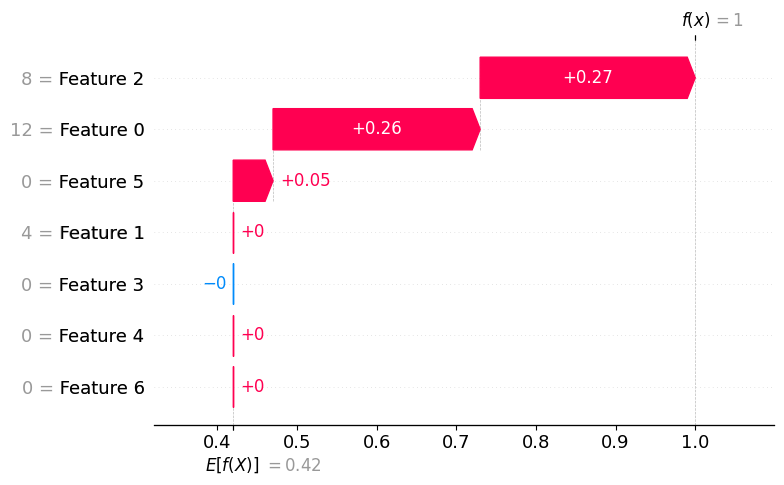

In [3]:
SP.waterfall_plot(20)

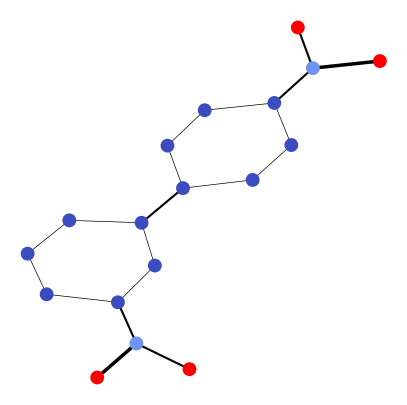

In [5]:
SP.highlight_features(20, 2)